# Dimensionality Reduction

#### Goal:

Transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data.

#### Why?

* Techincal : computation comlexity
* Essential: What features are important?, curse of dimensionality, visualtion

#### How?

* Feature selection : choose some of the 'important' features.
* Features projection: transforming the features, and then (if you want) select the important ones.

### Features Projection

* linear transformation, e.g. Principal Component Analysis (PCA)
* Non-linear transformation, e.g. t-SNE, UMAP

## Example


In [1]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
y=breast_cancer.target
print('breast cancer data has' ,breast_cancer.data.shape[1], 'features', breast_cancer.data.shape[0], 'samples' )

breast cancer data has 30 features 569 samples


In [2]:
print(breast_cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


# Principal Component Analysis (PCA)

Consider the data is $\hat{X}= \begin{bmatrix} \vec{X}_1 \\ \vec{X}_2 \\ \vdots \\ \vec{X}_M \end{bmatrix}= \begin{bmatrix} \vec{X}^1, \vec{X}^2, \dots, \vec{X}^N \end{bmatrix} \in {\mathbb R}^{M\times N}$, where $M$=#samples, and $N$=# features.

*Note:* columns vecotrs are given with superscript $\vec{X}^n$, and row vectors are represented with subscript $\vec{X}_m$.  

**Assumption:** for every column of $\hat{X}$ fulfills  $\sum_{m=1}^M X_{m,n} =0$ $\leftarrow $ zero mean. 




### Main idea:

Find a linear combination (transformation) of the features: $\hat{T} = \hat{X}\hat{W} $ such that:   

1.  For the $k$-th columns of $\hat{T}$: 

$$\|\vec{T}^k\|>\|\vec{T}^{k-1}\|$$

  (i.e. the columns are ordered corresponds to the variance; $\|\vec{T}^k\|^2 =(\vec{T}^k)^T \vec{T}^k=\sum_m T_{mk}^2 =\sigma_k^2$)
 
2. Each columns in $\hat{W}$ fulfills: 

$$ \| \vec{W^k} \|=1  $$

  i.e. the weights are normalized.

3. Mutual orthogonality: 

$$ \forall k_1,k_2: \vec{W}_{k_2} \perp \vec{W}_{k_1} $$




### Singular Values Decomposition:

Use the singular value decomposition (svd) of the covariance matrix $\hat{S}\equiv \hat{X}^T \hat{X} $:

$$\hat{S} = \hat{W} \hat{\Lambda} \hat{W}^T $$

where $\hat{\Lambda}$ is a diagonal matrix with $\Lambda_{ii}=\lambda_i$ are the eigenvalues of $\hat{S}$ and $\lambda_1 \geq \lambda_2 \dots \geq \lambda_M$. 
Matrix $\hat{W}$ is constructed from  orthonormal eigenvectors (ordered corresponding their eigenvalues). 

### Algorithm:

1. center the data: $\vec{X}^m = \vec{X}^m -\sum_m X_{m,n}$

2. find the covaraince matrix: $\hat{S}=\hat{X}^T\hat{X} \in {\mathbb R}^{N\times N}$.

3. find $\hat{S} = \hat{W} \hat{\Lambda} \hat{W}^T $

4. compute $\hat{T}=\hat{X}\hat{W}$

5. the projection of the data on the k-th pricipal components given by $\vec{T}^k$. 


## Example 1:

(*Nature Biotechnology volume 26, pages303–304 (2008)*)

Breast-cancer sample plotted against its expression levels for two genes GATA3 and XBP1. Samples are colored according to estrogen receptor (ER) status: ER+, red; ER−, black.


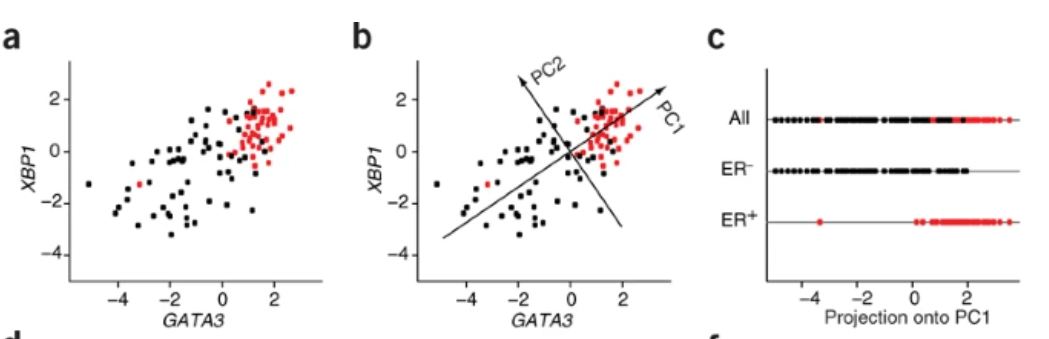

## Example 2:



In [8]:
import numpy as np 

X=breast_cancer.data
X_mean=np.mean(X,axis=0)

X_center=np.empty(X.shape)
for i in range(X.shape[1]):
    X_center[:,i]=X[:,i]-X_mean[i]
    
Cov=np.dot(np.transpose(X_center),X_center)


In [9]:
u, s, vh = np.linalg.svd(Cov,hermitian=True)
vh.shape

(30, 30)

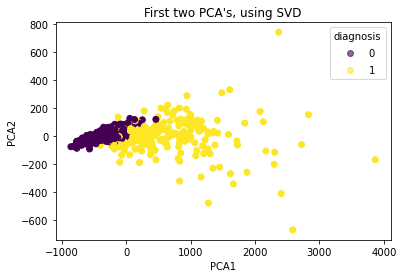

In [10]:
import matplotlib.pyplot as plt

scatter=plt.scatter(np.dot(X_center,vh[0,:]),np.dot(X_center,vh[1,:]),c=1-y)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('First two PCA\'s, using SVD')

handles, labels = scatter.legend_elements(prop='colors', alpha=0.6)
legend1 = plt.legend(handles, labels, title="diagnosis")



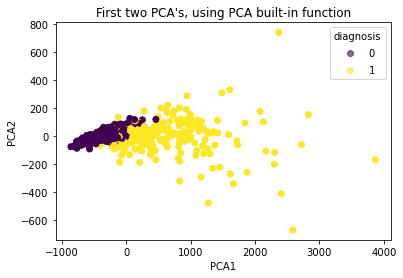

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X)
X = pca.transform(X)
plt.scatter(X[:,0], X[:,1],c=1-y)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('First two PCA\'s, using PCA built-in function')

handles, labels = scatter.legend_elements(prop='colors', alpha=0.6)
plt.legend(handles, labels, title="diagnosis")

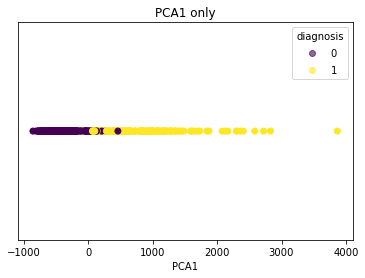

In [12]:
plt.scatter(X[:,0],np.zeros(X[:,0].shape),c=1-y)
plt.xlabel('PCA1')
plt.yticks([], [])
plt.title('PCA1 only')

handles, labels = scatter.legend_elements(prop='colors', alpha=0.6)
plt.legend(handles, labels, title="diagnosis")

### Limitations:

1. dimensionality of the features (one can use dimensionless features)

2. importance of features does not necessarily correspond their variance

3. linear vs non-linear correlations  (complimentary method: kernal PCA) 

4. centering the data might cuase the results to be meaningless. (see NMF)

Reference:

[A Tutorial on Principal Component Analysis, J. Shlens (2013)](
https://www.cs.princeton.edu/picasso/mats/PCA-Tutorial-Intuition_jp.pdf)

[What is principal component analysis?, M. Ringnér,  *Nature Biothechnology* (2008) ](https://www.nature.com/articles/nbt0308-303)